In [2]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 36.5 MB/s eta 0:00:00


In [3]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

In [4]:
# First step is to initialize the Hands class an store it in a variable
mp_hands = mp.solutions.hands

# Now second step is to set the hands function which will hold the landmarks points
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3)

# Last step is to set up the drawing function of hands landmarks on the image
mp_drawing = mp.solutions.drawing_utils

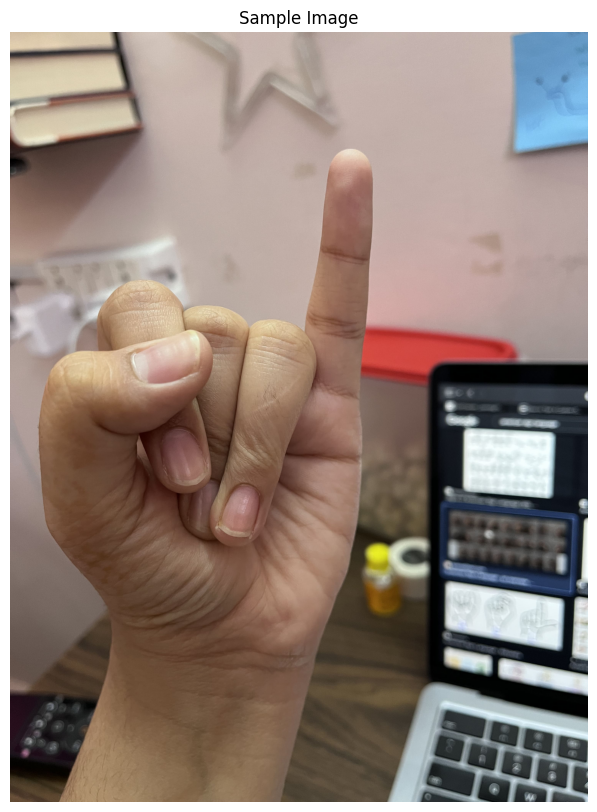

In [14]:
# Reading the sample image on which we will perform the detection
sample_img = cv2.imread('/content/drive/MyDrive/hands/IMG_2407.jpg')

# Here we are specifing the size of the figure i.e. 10 -height; 10- width.
plt.figure(figsize = [10, 10])

# Here we will display the sample image as the output.
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [15]:
#relative coordinates
results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

if results.multi_hand_landmarks:

   for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')

        for i in range(2):
            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}')


HAND NUMBER: 1
-----------------------
WRIST:
x: 0.33666378259658813
y: 0.7987021207809448
z: -1.9096039522992214e-06

THUMB_CMC:
x: 0.20251767337322235
y: 0.7185693979263306
z: -0.07878261804580688



In [16]:
#absolute coordinates
image_height, image_width, _ = sample_img.shape

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):

        print(f'HAND NUMBER: {hand_no+1}')
        print('-----------------------')

        for i in range(2):
            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'x: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width}')
            print(f'y: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height}')
            print(f'z: {hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * image_width}n')

HAND NUMBER: 1
-----------------------
WRIST:
x: 1018.0712785720825
y: 3220.3669509887695
z: -0.005774642351752846n
THUMB_CMC:
x: 612.4134442806244
y: 2897.271812438965
z: -238.23863697052002n


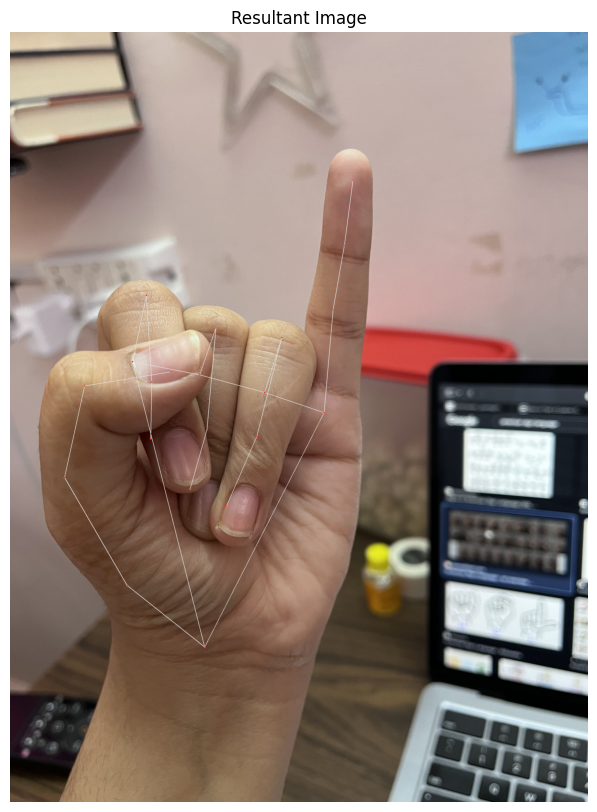

In [17]:
img_copy = sample_img.copy()

if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):

        mp_drawing.draw_landmarks(image = img_copy, landmark_list = hand_landmarks,
                                  connections = mp_hands.HAND_CONNECTIONS)
    fig = plt.figure(figsize = [10, 10])

    plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()